# Configurazione di Fabry Perot


0.30330001290978675
0.24606780042970708
0.08454215947252658
0.1831337748737141
0.1831337748737141
0.014166449774246774
d: 0.00526771458468858 +- 0.00010752689885696458
N_0: 16648.354228107564 +- 339.83348958512994


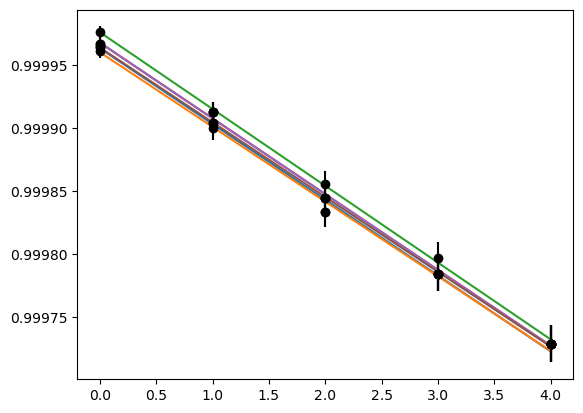

In [121]:
import pandas as pd
import numpy as np

_lambda = 632.8 * 10**(-9)

dati = pd.read_excel("Interferometro.xlsx")

# distanze in metri
#display(dati)
L_focale = 18 * 10**(-3)
distanza_lente_schermo = 1.605

distanza_eff = distanza_lente_schermo - L_focale

raggi = dati["raggio "] * 10**(-2)

angoli = np.arctan(raggi/distanza_eff)

# propagate angloli error
err_raggi = 10**(-3)
err_distanza_eff = 10**(-3)

dfdx = 1/(1 + (raggi/distanza_eff)**2)
err_angoli = angoli*np.sqrt((dfdx*err_raggi/distanza_eff)**2 + (dfdx*raggi/distanza_eff**2 * err_distanza_eff)**2)

# propagate coseni error
coseni = np.cos(angoli)
err_coseni = np.cos(angoli)*err_angoli

from iminuit import Minuit
from iminuit.cost import LeastSquares

def linear_cost(x, a, b):
    return a + b*x

x = [4,3,2,1,0]

def minimi_quadrati_fit(alfa, beta):
    minimi_quadrati = LeastSquares(x, coseni[alfa:beta], err_coseni[alfa:beta], linear_cost)

    m = Minuit(minimi_quadrati, a=0, b=0)

    m.migrad()
    # label every graph obtained by m.visualize()
    m.visualize()

    d = -1/(2*m.values["b"])*(_lambda)
    err_d = 1/(2*m.values["b"]**2)*m.errors["b"]*(_lambda)

    N_0 = m.values["a"]*2*d/(_lambda)
    err_N_0 = N_0*np.sqrt((m.errors["a"]/m.values["a"])**2 + (err_d/d)**2)
    # print chi normalized
    print(m.fval/(len(x)-2))
    return d, err_d, N_0, err_N_0

vec_d = []
vec_err_d = []
vec_N_0 = []
vec_err_N_0 = []

for i in range(0, 5*6, 5):
    fit_data = minimi_quadrati_fit(i, i+5)
    vec_d.append(fit_data[0])
    vec_err_d.append(fit_data[1])
    vec_N_0.append(fit_data[2])
    vec_err_N_0.append(fit_data[3])

# calculate weighted mean of d and N_0
mean_d = np.average(vec_d, weights=1/np.array(vec_err_d)**2)
mean_N_0 = np.average(vec_N_0, weights=1/np.array(vec_err_N_0)**2)

# calculate weighted mean errors
err_mean_d = np.sqrt(1/np.sum(1/np.array(vec_err_d)**2))
err_mean_N_0 = np.sqrt(1/np.sum(1/np.array(vec_err_N_0)**2))

print(f"d: {mean_d} +- {err_mean_d}")
print(f"N_0: {mean_N_0} +- {err_mean_N_0}")

In [114]:
import pandas as pd

dati = pd.read_excel("Interferometro.xlsx")
display(dati)


,L focale [mm],18,d [micrometri],n frange,raggio,costheta,x,y,Unnamed: 8,Unnamed: 9,Deltad eff [microm],DeltaN,DeltaN medio,Unnamed: 13,Michelson,Unnamed: 15,Deltad eff [microm].1,DeltaN.1
0,"d(lente,schermo) [cm]",160.5000,26.0,5.0,3.70,0.999734,0.0,0.000000,NaN,NaN,10.0,27.0,29.4,NaN,"d(lente,schermo) [cm]",167.8,10.0,29.0
1,lamda [microm],0.6328,NaN,NaN,3.30,0.999789,1.0,0.000054,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,33.0
2,NaN,NaN,NaN,NaN,2.90,0.999837,2.0,0.000102,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0
3,NaN,NaN,NaN,NaN,2.20,0.999906,3.0,0.000172,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0
4,NaN,NaN,NaN,NaN,1.35,0.999965,4.0,0.000230,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,31.0
5,NaN,NaN,46.0,NaN,3.70,0.999734,NaN,0.000000,NaN,NaN,7.0,19.0,20.4,NaN,NaN,NaN,7.0,22.0
6,NaN,NaN,NaN,NaN,3.30,0.999789,NaN,0.000054,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,21.0
7,NaN,NaN,NaN,NaN,2.90,0.999837,NaN,0.000102,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,18.0
8,NaN,NaN,NaN,NaN,2.25,0.999902,NaN,0.000167,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,21.0
9,NaN,NaN,NaN,NaN,1.40,0.999962,NaN,0.000228,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,20.0


In [122]:
delta_N = np.array(dati["DeltaN"])

def calcola_delta_d(nome_colonna, nome_aspettazione):
    delta_N = np.array(dati[nome_colonna])

    delta_d = []
    sigma_delta_d = []

    medie_delta_N = []
    sigma_delta_N = []

    # Calcola la media di ciascun set
    for i in range(0, 3*5, 5):
        current_set = delta_N[i:i+5]

        media_set = np.mean(current_set)
        medie_delta_N.append(media_set)

        err_set = np.std(current_set) / np.sqrt(len(current_set)) # errore della media!
        sigma_delta_N.append(err_set)
    
    delta_d = np.array(medie_delta_N)*_lambda/2 
    sigma_delta_d = np.array(sigma_delta_N)*_lambda/2

    # shwo every delta d with each sigma_delta_d
    for i in range(len(delta_d)):
        valore_atteso = dati[nome_aspettazione][i*5]*10**(-6)
        valore_calcolato = delta_d[i]
        errore = sigma_delta_d[i]

        print(f"Valore atteso: {valore_atteso}, valore calcolato: {valore_calcolato} +- {errore}")

        # test di t student
        t = (valore_calcolato - valore_atteso) / errore
        print(f"t: {t}")
        # gradi di libertà = 5-1 = 4
        # alpha = 0.05
        # t critico = 2.776
        if abs(t) > 2.776:
            print("Rifiuto l'ipotesi nulla")
        else:
            print("Accetto l'ipotesi nulla")


calcola_delta_d("DeltaN", "Deltad eff [microm]")


Valore atteso: 9.999999999999999e-06, valore calcolato: 9.30216e-06 +- 2.299076572887471e-07
t: -3.035305601516195
Rifiuto l'ipotesi nulla
Valore atteso: 7e-06, valore calcolato: 6.45456e-06 +- 1.443006018005469e-07
t: -3.779887215951534
Rifiuto l'ipotesi nulla
Valore atteso: 4.9999999999999996e-06, valore calcolato: 4.61944e-06 +- 1.1319870529294936e-07
t: -3.361875906753002
Rifiuto l'ipotesi nulla


# Configurazione di Michelson

In [119]:
calcola_delta_d("DeltaN.1", "Deltad eff [microm].1")

distanza_lente_schermo = 167.8 * 10**(-2) # metri

# il test è superato con cos(theta) circa 1 come assunzione!

Valore atteso: 9.999999999999999e-06, valore calcolato: 9.492e-06 +- 2.5312e-07
t: -2.00695322376738
Accetto l'ipotesi nulla
Valore atteso: 7e-06, valore calcolato: 6.45456e-06 +- 1.9193774323983283e-07
t: -2.841754783572995
Rifiuto l'ipotesi nulla
Valore atteso: 4.9999999999999996e-06, valore calcolato: 4.87256e-06 +- 1.4430060180054688e-07
t: -0.8831563999722436
Accetto l'ipotesi nulla
